# SVM Iplementation for Classifying Datasets

In this notebook we are going to classify the next datasets using SVM:
https://archive.ics.uci.edu/ml/datasets/banknote+authentication


https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+

For that we are going to divide the process in the next six steps:

1) Specify which Machine Learning problem are we solving.

2) Provide a short summary of the features and the labels we are working on.

3) Answer the following questions: a) Are these datasets linearly separable? b) Are these datasets randomly chosen and c) The sample size is enough to guarantee generalization.

4) Provide an explanation how and why the code is working. 

5) Show some examples to illustrate that the method is working properly.

6) Provide quantitative evidence for generalization using the provided dataset.


# 1) Introduction

The idea of this notebook is to solve a supervised learning problem that consist of a binary classification task. We have a dataset with features and two labels and the objective is to give the appropiate label to data not seen before. We are going to work with two different dataset, so first we are going to understand each one.



# Banknote Authentication Data Set

2) The first one is extracted from images of genuine and forged banknotes and we want and algorithm that let us decide if a new banknote is authentic or not, that is, the labels are "genuine" or "forged".

In this dataset there are 1372 instances and 5 attributes or features but the last one is exactly the label we want to predict, therefore we have 4 features:

*   Variance of Wavelet Transformed image (continuous)
*   Skewness of Wavelet Transformed image (continuous)
*   Curtosis of Wavelet Transformed image (continuous)
*   Entropy of image (continuous)

To better understand the features let's start by looking what the Wavelet Transformed is. 

Wavelet transformed is a tool that allows us to make a detailed analysis of signals or sounds, or in the case of images, it allows us to filter out the noise. In general a Wavelet transformed decompose a signal using scaled and shifted versions of an specific wavelet (a wavelet is a signal or a waveform that has specific properties).

La Transformada Wavelet Discreta (DWT) transforma un vector de datos de longitud n
en otro vector de coeficientes wavelets de longitud n, usando un conjunto de n funciones bases
ortogonales llamadas wavelets. 
file:///C:/Users/valeo/Downloads/22-Texto%20del%20art%C3%ADculo-102-1-10-20130820.pdf


On the other hand, entropy is a statistical measure of randomness that can be used to characterize the texture of an image.


3) Now we are going to estudy the data set.

a) Linearly separable 

b) Randomly chosen 

c) Guarantee generalization 


#Occupancy Detection Data Set

2) The second data set was obtained from  time stamped pictures that were taken every minute. In this case we want to decide betwen de labels "occupied" 0 or "not occupied" 1.

There are 20560 instances and 6 attributes or features: 



*   date time year-month-day hour:minute:second
*   Temperature, in Celsius
*   Relative Humidity, %
*   Light, in Lux
*   CO2, in ppm
*   Humidity Ratio, Derived quantity from temperature and relative humidity, in kgwater-vapor/kg-air

In the dataset again appears one more instance that matches with the labels we want 0 or 1, 0 for not occupied, 1 for occupied status.

3) 

a)

b)

c)









In [ ]:
#Linearly separable 


#4) Model Explanation

 Next, we can found the code with some comments that explain how does the code works and after that a general explanation of why does it work.

In [ ]:
# https://pythonprogramming.net/svm-optimization-python-2-machine-learning-tutorial/?completed=/svm-optimization-python-machine-learning-tutorial/
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

class Support_Vector_Machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        #We define the colors of the associated classes, where red is for the forged banknotes and blue for the genuine ones
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)

    # train (optimization part)
    def fit(self, data):
        self.data = data
        # We define this dictionary to save the values { ||w||: [w,b] }
        opt_dict = {}

        # Transforms that we are going to apply to the vector w to optimize w
        transforms = [[1,1],
                      [-1,1],
                      [-1,-1],
                      [1,-1]]

        #Reconstruction of the dataset (only the characteristic) where the first value is the label and then the vectors that represent the features, to take max and min feature value
        #of the dataset take all the features
        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)

        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None

        # support vectors yi(xi.w+b) = 1

        #We start looking a good value using big steps (0.1), after we find a good one we use smaller steps (0.01) and then we repeat the process 
        
        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      # point of expense:
                      self.max_feature_value * 0.001,]

        
        
        # extremely expensive
        b_range_multiple = 5
        # we dont need to take as small of steps 
        # with b as we do w
        b_multiple = 5
        # latest_optimum is going to be the first element in vector w
        latest_optimum = self.max_feature_value*10


        #We want the minimum magnitude of w and the maximum b

        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            # we can do this because convex
            optimized = False
            #While va a funcionar siempre que no esté optimizado, por eso en la anterior linea definimos optimized as false
            while not optimized:
              #we take b from -the maximum value to the maximum value in steps 
              #of 5 times the steps of w
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transforms:
                      #We multiply w with the vectors of transformation component to component
                        w_t = w*transformation
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit
                        # yi(xi.w+b) >= 1
                        # 
                        # #### add a break here later..
                        for i in self.data:
                          #for all data we are going to verify, so if there is 
                          #at least one i that doesn't meet the condition, then we return false
                            for xi in self.data[i]:
                                #we only change the label's name
                                yi=i
                                # Verifiy constraints, if it doesn't meet the 
                                #condition then it doesn't save the value
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                                    
                        if found_option:
                            # Computes norm for the ones who meet the condition
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]

                #w da la pendiente de la recta y la distancia entre los soportes
                #¿POR QUÉ? basta revisar los positivos para estudiar todas las posibles opciones, pues w<0 repiten casos que ya se vieron
                if w[0] < 0:
                  # it appears  "Optimized a step" when we finish the while of the first step
                    optimized = True
                    print('Optimized a step.')
                else:
                    w = w - step

            #norms is vector of all the values of opt_dict organized from the smallest
            #to the biggest, so norms[0] is going to be the smallest 
            #so we take the smallest w of the list and we use it to define latest_optimum that 
            #is going to be the new component of w
            norms = sorted([n for n in opt_dict])
            #||w|| : [w,b]
            opt_choice = opt_dict[norms[0]] #el de norma más chiquita
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            #opt_choice[0] is w and opt_choice[0][0] is the fisrt component of w
            latest_optimum = opt_choice[0][0]+step*2


            
            
    #Gives the data to predict and returns the label of it
    def predict(self,features):
        # The classification depends on the sign of x.w+b (x:np.array(features) w:self.w  b:self.b)
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
    #We add two lines: if x.w+b is different from 0 then we mark it with a star of the corresponging color
        if classification !=0 and self.visualization:
            self.ax.scatter(features[0], features[1], s=200, marker='*', c=self.colors[classification])
        return classification

    #Now we define a function that let us see the data in the corresponding color and the decision boundary
    def visualize(self):
      [[self.ax.scatter(x[0],x[1],s=100,color=self.colors[i]) for x in data_dict[i]] for i in data_dict]
      
      def hyperplane(x,w,b):
        return (-w[0]*x-b) / w[1]

      #We define the graph domain depending on the smallest and biggest value of x
      range = (self.min_feature_value*0.9,self.max_feature_value*1.1)
      hyp_x_min=range[0]
      hyp_x_max=range[1]

      sv1=hyperplane(hyp_x_min, self.w, self.b)
      sv2=hyperplane(hyp_x_max, self.w, self.b)
      self.ax.plot([hyp_x_min,hyp_x_max],[sv1,sv2], "g")

      plt.show()

        



#5) Model Testing

 We are going to prove the code with the next data set that is linearly separable. 

Optimized a step.
Optimized a step.
Optimized a step.


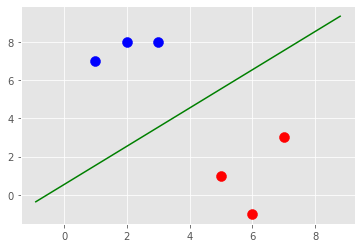

In [ ]:
#Small example of dataset with the two labels 1 and -1        
data_dict = {-1:np.array([[1,7],
                          [2,8],
                          [3,8],]),
             
             1:np.array([[5,1],
                         [6,-1],
                         [7,3],])}

svm1 = Support_Vector_Machine()
svm1.fit(data=data_dict)
svm1.visualize()

#Let's see the grah of the last dataset 
#plt.scatter(data_dict[-1][:, 0], data_dict[-1][:, 1], c = 'b')
#plt.scatter(data_dict[1][:, 0], data_dict[1][:, 1], c = 'r')

Optimized a step.
Optimized a step.
Optimized a step.


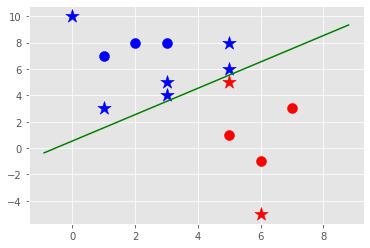

In [ ]:
#Let's make the graph of the decision hyperplane
#x =np.linspace(1,7,2)
#w = svm1.w
#b = svm1.b
#y = (-b-w[0]*x)/w[1]

#plt.scatter(data_dict[-1][:,0],data_dict[-1][:,1],c="b")
#plt.scatter(data_dict[1][:,0],data_dict[1][:,1],c="r")
#plt.plot(x,y,c="green")

#plt.show()

#Now we are going to predict the labels of new values

svm = Support_Vector_Machine()
svm.fit(data=data_dict)
predict_us = [[0,10],
              [1,3],
              [3,4],
              [3,5],
              [5,5],
              [5,6],
              [6,-5],
              [5,8]]

for p in predict_us:
    svm.predict(p)

svm.visualize()


In [ ]:
svm1.predict([7,3.5])

1.0

# 6) 

https://la.mathworks.com/help/images/ref/entropy.html


In [ ]:
import pandas as pd
#First we save the dataset in such a way that we can call any feeature
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt", 
                 sep = ',', 
                 header = None, 
                 names=["variance_of_Wavelet","skewness_of_Wavelet",
                        "curtosis_of_Wavelet","entropy",
                        "class"],
                 thousands = ',')
variables=["variance_of_Wavelet","skewness_of_Wavelet",
                        "curtosis_of_Wavelet","entropy"]

print("Dimensionality of the Dataframe:",df.shape)


Dimensionality of the Dataframe: (1372, 5)


In [ ]:
print(df.loc[0].at["variance_of_Wavelet"])


3.6216


So we can see that it agrees with the information given at first.


[1] https://people.seas.harvard.edu/~yaron/AM221-S16/lecture_notes/AM221_lecture13.pdf

**a)Linearly Separable**

To analyze if the two data sets linearly are saparable (there exists a hyperplane separating the points with label 1 from the points with label -1) we are going to use the following result.

*Proposition: Two sets are linearly separable if and only if the convex hulls of the vectors of each class don't intersect. [1]*

On the other hand we know that convex hull $C$ of the points $\{x_1,.~.~.~,x_k\}$ can be seen as
$$C =\{x:x=\sum_{i=1}^n α_ix_i,~α_i\geq 0 ~ and~\sum_{i=1}^n α_i=1. \}.$$
In our case we have two sets:
$$P=\{w: the~ label~ of~ w ~is~ 1\}~~~~~~~~~N=\{w: the~ label~ of~ w ~is~ -1\}$$
so we are going to define a function that can decide if a point $x$ belongs or not to the convex hull of its set.


In [ ]:
#Function to decide if a point x is part of the convex hull
def hull(points, x):
  long_points=len(points)
  long_x= len(x)
  

#SVM implementation (with sklearn)

Now we are going to implement Support Vector Machine to the datasets, lets start with the Bancnote Authentication. 

In [ ]:
from sklearn.model_selection import train_test_split
#We divide the dataset randomly in 80% for training and 20% for testing
train_set_df, test_set_df= train_test_split(df, test_size=0.2,random_state=42)

In [ ]:
#Definition of the features X and the labels y for training
X=train_set_df[['variance_of_Wavelet', 'skewness_of_Wavelet', 'curtosis_of_Wavelet','entropy']]
y=train_set_df["class"]
#df.keys()

In [ ]:
 #Definition of the features X_test and the labels y_test for testing
 X_test=test_set_df[['variance_of_Wavelet', 'skewness_of_Wavelet', 'curtosis_of_Wavelet',
       'entropy']]
y_test=test_set_df['class']

In [ ]:
from sklearn import svm

In [ ]:
X.shape
y.shape


NameError: ignored

In [ ]:
#Implementation of the module
clf= svm.SVC()
clf.fit(X, y)

SVC()

In [ ]:
predicted_svm= clf.predict(X)
predicted_svm_test=clf.predict(X_test)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
#Accuracy measure for the training set
accuracy_train= accuracy_score(y, predicted_svm).round(2)
conf_matrix_train= confusion_matrix(y , predicted_svm)

In [ ]:
print('Accuracy:', accuracy)
print('Confusion matrix:\n', conf_matrix_train)

Accuracy: 1.0
Confusion matrix:
 [[609   5]
 [  0 483]]


In [ ]:
#Accuracy measure for the testing dataset
accuracy_test= accuracy_score(y_test, predicted_svm_test).round(2)
conf_matrix_test= confusion_matrix(y_test, predicted_svm_test)

In [ ]:
print('Acuracy:',accuracy_test)
print('Confusion matrix:\n', conf_matrix_test)

Acuracy: 1.0
Confusion matrix:
 [[148   0]
 [  0 127]]


We can see that the method has a 100% accuracy, which means, it classify correctly all the dataset 

In [ ]:
# https://pythonprogramming.net/svm-optimization-python-2-machine-learning-tutorial/?completed=/svm-optimization-python-machine-learning-tutorial/
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

class Support_Vector_Machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        #We define the colors of the associated classes, where red is for the forged banknotes and blue for the genuine ones
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)

    # train (optimization part) d:number of directions
    def fit1(self, data, d):
        self.data = data
        # We define this dictionary to save the values { ||w||: [w,b] }
        opt_dict = {}

        # Transforms that we are going to apply to the vector w to optimize w
        transforms = []
        rad=d*np.pi/180
        for angle in np.arange(0,2*np.pi,rad):
          transforms.append([np.cos(angle), np.sin(angle)])

        

        #Reconstruction of the dataset (only the characteristic) where the first value is the label and then the vectors that represent the features, to take max and min feature value
        #of the dataset take all the features
        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)

        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None

        # support vectors yi(xi.w+b) = 1

        #We start looking a good value using big steps (0.1), after we find a good one we use smaller steps (0.01) and then we repeat the process 
        
        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      # point of expense:
                      self.max_feature_value * 0.001,]

        
        
        # extremely expensive
        b_range_multiple = 5
        # we dont need to take as small of steps 
        # with b as we do w
        b_multiple = 5
        # latest_optimum is going to be the first element in vector w
        latest_optimum = self.max_feature_value*10


        #We want the minimum magnitude of w and the maximum b

        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            # we can do this because convex
            optimized = False
            #While va a funcionar siempre que no esté optimizado, por eso en la anterior linea definimos optimized as false
            while not optimized:
              #we take b from -the maximum value to the maximum value in steps 
              #of 5 times the steps of w
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transforms:
                      #We multiply w with the vectors of transformation component to component
                        w_t = w*transformation
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit
                        # yi(xi.w+b) >= 1
                        # 
                        # #### add a break here later..
                        for i in self.data:
                          #for all data we are going to verify, so if there is 
                          #at least one i that doesn't meet the condition, then we return false
                            for xi in self.data[i]:
                                #we only change the label's name
                                yi=i
                                # Verifiy constraints, if it doesn't meet the 
                                #condition then it doesn't save the value
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                                    
                        if found_option:
                            # Computes norm for the ones who meet the condition
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]

                #w da la pendiente de la recta y la distancia entre los soportes
                #¿POR QUÉ? basta revisar los positivos para estudiar todas las posibles opciones, pues w<0 repiten casos que ya se vieron
                if w[0] < 0:
                  # it appears  "Optimized a step" when we finish the while of the first step
                    optimized = True
                    print('Optimized a step.')
                else:
                    w = w - step

            #norms is vector of all the values of opt_dict organized from the smallest
            #to the biggest, so norms[0] is going to be the smallest 
            #so we take the smallest w of the list and we use it to define latest_optimum that 
            #is going to be the new component of w
            norms = sorted([n for n in opt_dict])
            #||w|| : [w,b]
            opt_choice = opt_dict[norms[0]] #el de norma más chiquita
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            #opt_choice[0] is w and opt_choice[0][0] is the fisrt component of w
            latest_optimum = opt_choice[0][0]+step*2


            
            
    #Gives the data to predict and returns the label of it
    def predict(self,features):
        # The classification depends on the sign of x.w+b (x:np.array(features) w:self.w  b:self.b)
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
    #We add two lines: if x.w+b is different from 0 then we mark it with a star of the corresponging color
        if classification !=0 and self.visualization:
            self.ax.scatter(features[0], features[1], s=200, marker='*', c=self.colors[classification])
        return classification

    #Now we define a function that let us see the data in the corresponding color and the decision boundary
    def visualize(self):
      [[self.ax.scatter(x[0],x[1],s=100,color=self.colors[i]) for x in data_dict[i]] for i in data_dict]
      
      def hyperplane(x,w,b):
        return (-w[0]*x-b) / w[1]

      #We define the graph domain depending on the smallest and biggest value of x
      range = (self.min_feature_value*0.9,self.max_feature_value*1.1)
      hyp_x_min=range[0]
      hyp_x_max=range[1]

      sv1=hyperplane(hyp_x_min, self.w, self.b)
      sv2=hyperplane(hyp_x_max, self.w, self.b)
      self.ax.plot([hyp_x_min,hyp_x_max],[sv1,sv2], "g")

      plt.show()

        



Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.


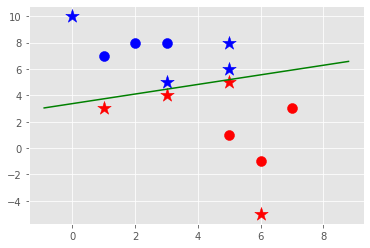

In [ ]:
data_dict = {-1:np.array([[1,7],
                          [2,8],
                          [3,8],]),
             
             1:np.array([[5,1],
                         [6,-1],
                         [7,3],])}

svm1 = Support_Vector_Machine()
svm1.fit1(data_dict , 10)
#svm1.fit1(data=data_dict, 2)
#svm1.visualize()

predict_us = [[0,10],
              [1,3],
              [3,4],
              [3,5],
              [5,5],
              [5,6],
              [6,-5],
              [5,8]]

for p in predict_us:
    svm1.predict(p)

svm1.visualize()



Optimized a step.
Optimized a step.
Optimized a step.


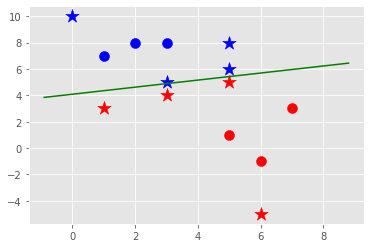

In [ ]:
try_data= {-1:np.array([[3,7],
                          [1,2],
                          [1,5],]),
             
             1:np.array([[5,1],
                         [6,7],
                         [6,4],])}

svm1 = Support_Vector_Machine()
svm1.fit1(data_dict , 15)

predict_us = [[0,10],
              [1,3],
              [3,4],
              [3,5],
              [5,5],
              [5,6],
              [6,-5],
              [5,8]]

for p in predict_us:
    svm1.predict(p)

svm1.visualize()